In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares as nls

In [2]:
def Read_file(filename):
    data = []
    filename = filename + ".txt"
    file = open(filename, "r")
    for coor in file:
        data.append(coor.split())
    data = np.array(data, dtype='float')
    return data

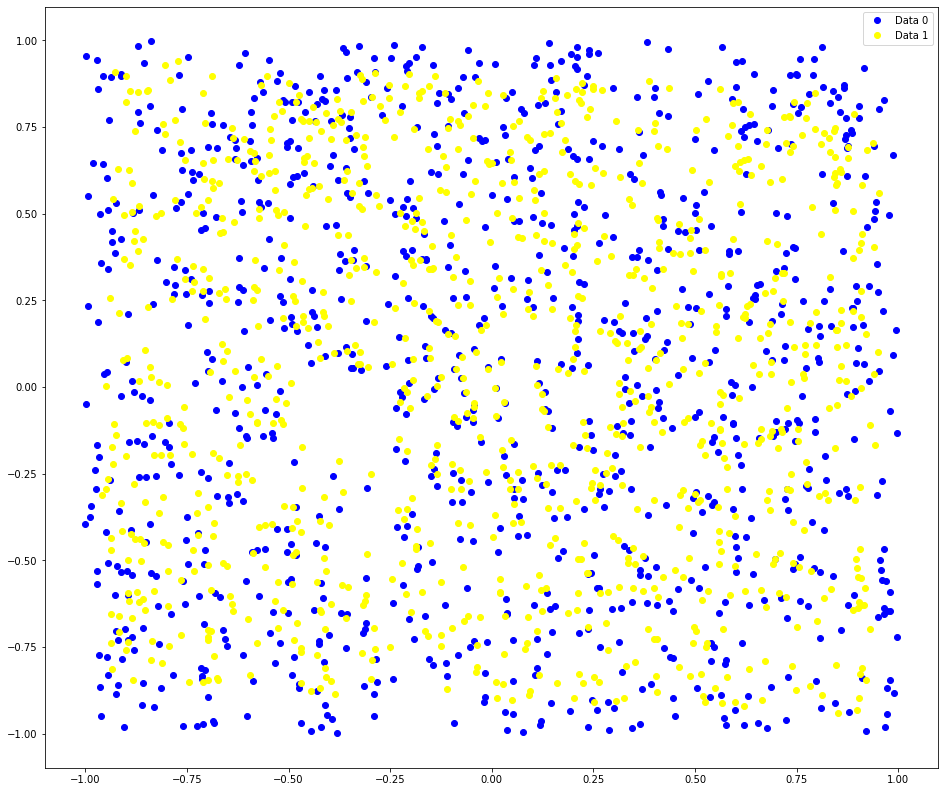

In [3]:
x0 = Read_file("linear_vectorfield_data_x0")
x1 = Read_file("linear_vectorfield_data_x1")

plt.figure(figsize=(16,14))
plt.plot(x0[:,0], x0[:,1], 'o', label="Data 0", color="blue")
plt.plot(x1[:,0], x1[:,1], 'o', label="Data 1", color="yellow")
plt.legend()
plt.show()

In [29]:
v = (x1 - x0)/0.1




coef = np.linalg.lstsq(v[:,0], v[:,1], rcond=-1)
print(coef)

LinAlgError: 1-dimensional array given. Array must be two-dimensional

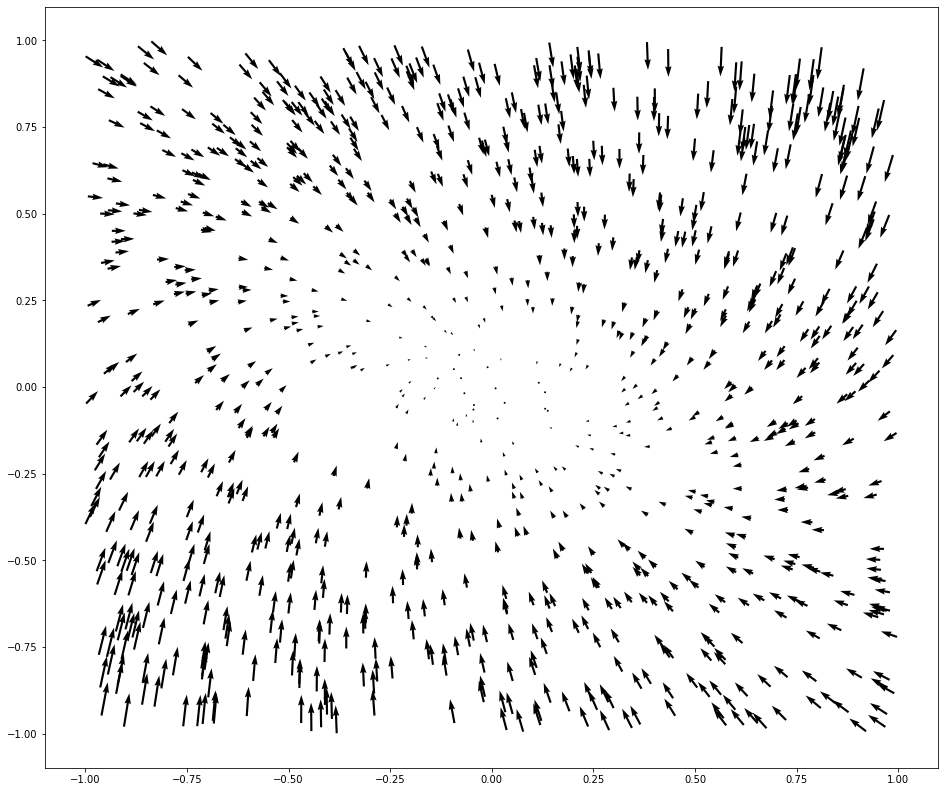

In [24]:
v = x1 - x0
dx = v[:,0]
dy = v[:,1]

plt.figure(figsize=(16,14))
plt.quiver(x0[:,0], x0[:,1], dx, dy)
plt.show()

(1000, 2)
(1000, 2)


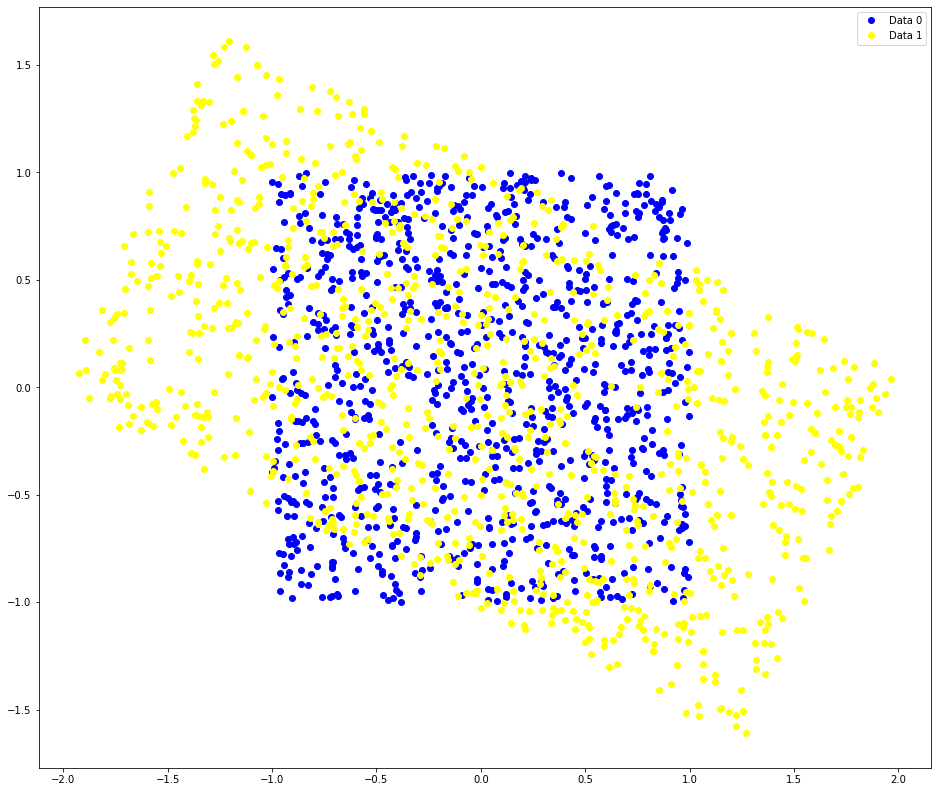

[2.38837794 1.39675929]


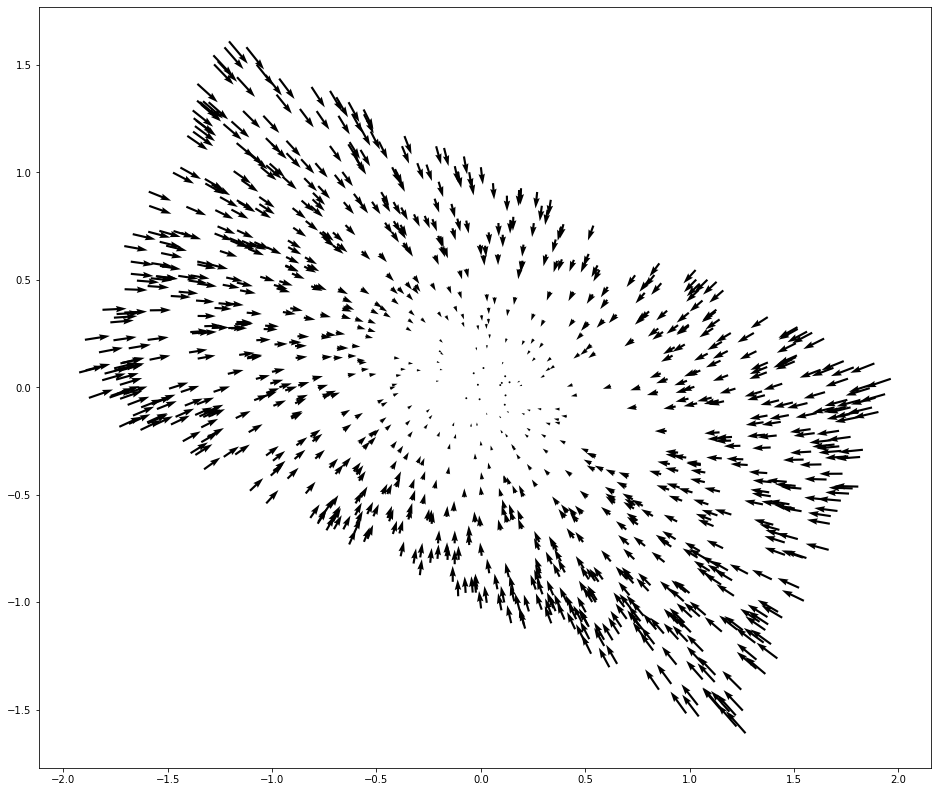

In [25]:
x_hat = x0.dot(coef[0]) #should be A.x not x.A
print(x_hat.shape)
print(x0.shape)

plt.figure(figsize=(16,14))
plt.plot(x0[:,0], x0[:,1], 'o', label="Data 0", color="blue")
plt.plot(x_hat[:,0], x_hat[:,1], 'o', label="Data 1", color="yellow")
plt.legend()
plt.show()

ax=0 #the average is performed along the column, for each row, returning an array
mse = (np.square(x0 - x_hat)).mean(axis=ax)
print(mse)

v_hat = x0 - x_hat
dx = v_hat[:,0]
dy = v_hat[:,1]

plt.figure(figsize=(16,14))
plt.quiver(x_hat[:,0], x_hat[:,1], dx, dy)
plt.show()